## Seasonal Statistics

Now, let's plot the seasonal variation of temperature as a stem plot and precipitation as a pie chart (being a share in proportion to the total year). First, let's load the data and process it.

In [1]:
import xarray as xarr

data = xarr.open_dataset("./data/clipped_monthly_single_1988.nc")
data["t2m_celsius"] = data["t2m"] - 273.15
seasonal_data  = data.assign_coords(season=data["valid_time"].dt.season)

Let's now compute our seasonal means and error bars.

In [2]:
seasonal_means_temp = seasonal_data["t2m_celsius"].groupby("season").mean(...)
seasonal_stds_temp = seasonal_data["t2m_celsius"].groupby("season").std(...)

seasons = ["DJF", "MAM", "JJA", "SON"]

means_temp = []
for season in seasons:
    means_temp.append(seasonal_means_temp.sel(season=season).values)

stds_temp = []
for season in seasons:
    stds_temp.append(seasonal_stds_temp.sel(season=season).values)


Finally, we can plot it.

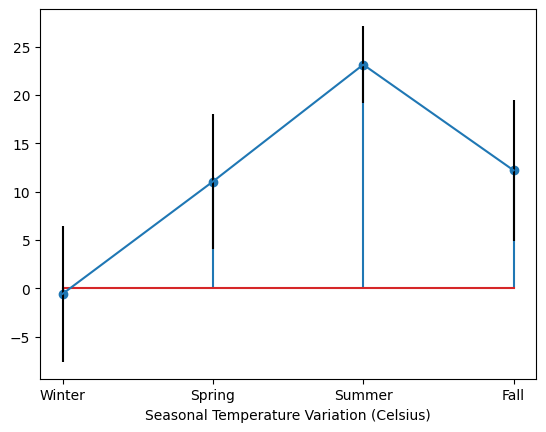

In [5]:
import matplotlib.pyplot as plot

season_labels = ["Winter", "Spring", "Summer", "Fall"]

plot.stem(season_labels, means_temp)
plot.errorbar(season_labels, means_temp, yerr = stds_temp, ecolor="black")
plot.xlabel("Seasonal Temperature Variation (Celsius)")
plot.savefig("./plots/Season_Stem_Plot_With_Error_Bars.png")

Now, let's plot the precipitation as a share of each season in proportion to the whole ([reference](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html))

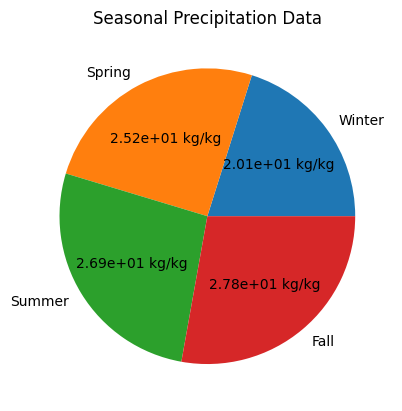

In [4]:
precipitation_means = seasonal_data["tp"].groupby("season").mean(...)
plot.pie(precipitation_means, labels=season_labels, autopct="%1.2e kg/kg")
plot.title("Seasonal Precipitation Data")
plot.savefig("./plots/Seasonal_Precipitation_Data_PieChart.png")
plot.show()